### OLS Task01
#### 쇼핑 고객 데이터

- Customer ID: 고객 아이디
- Gender: 고객의 성별
- Age: 고객의 나이
- Annual Income: 고객의 연소득
- Spending Score: 고객 행동 및 지출 성격에 따라 상점에서 할당한 점수
- Profession: 직업, 전문직
- Work Experience: 고객의 근무 경력(연 단위)
- Family Size: 가족 구성원 수

- **Spending Score** 가 타겟 데이터

In [1]:
import pandas as pd

c_df = pd.read_csv('./datasets/customers.csv')
c_df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [2]:
group_df = c_df[['Gender' , 'Spending Score (1-100)']].groupby('Gender').sum('Spending Score(1-100)').reset_index()
group_df

,Gender,Spending Score (1-100)
0,Female,60456
1,Male,41469


In [3]:
group_df.duplicated().sum()

0

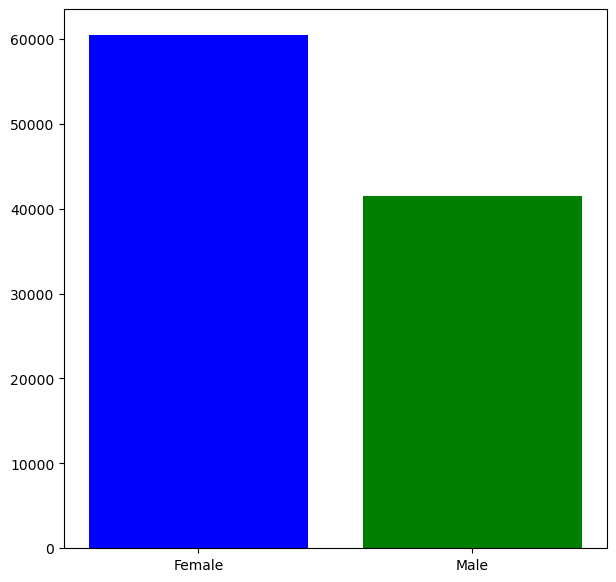

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 7))


colors = ['blue', 'green']


plt.bar(group_df.Gender, group_df['Spending Score (1-100)'], color=colors)

plt.show()


In [5]:
c_df = c_df.drop(labels=['CustomerID'], axis=1)
c_df

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1995,Female,71,184387,40,Artist,8,7
1996,Female,91,73158,32,Doctor,7,7
1997,Male,87,90961,14,Healthcare,9,2
1998,Male,77,182109,4,Executive,7,2


In [6]:
# 수치형 데이터들만 따로 분리
columns = ['Age' , 'Annual Income ($)' , 'Work Experience', 'Family Size', 'Spending Score (1-100)']

pre_df = c_df[columns]
pre_df

,Age,Annual Income ($),Work Experience,Family Size,Spending Score (1-100)
0,19,15000,1,4,39
1,21,35000,3,3,81
2,20,86000,1,1,6
3,23,59000,0,2,77
4,31,38000,2,6,40
...,...,...,...,...,...
1995,71,184387,8,7,40
1996,91,73158,7,7,32
1997,87,90961,9,2,14
1998,77,182109,7,2,4


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income ($)'}>],
       [<Axes: title={'center': 'Work Experience'}>,
        <Axes: title={'center': 'Family Size'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

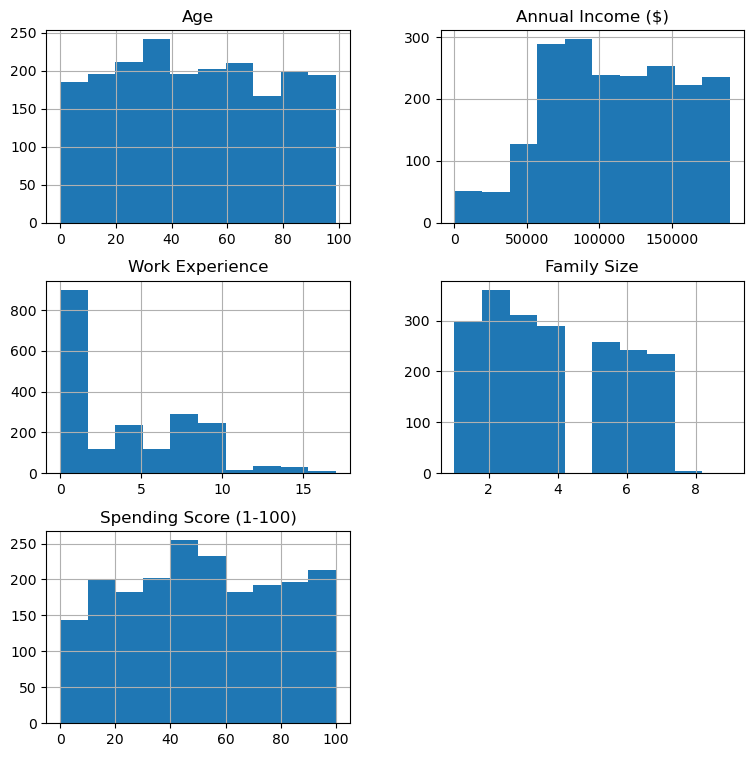

In [7]:
pre_df.hist(figsize=(9,9))

In [8]:
pre_df['Work Experience'].value_counts()

Work Experience
1     470
0     431
8     166
9     160
7     126
4     121
6     120
5     117
10     84
2      63
3      55
12     17
13     16
14     16
11     14
15     14
16      5
17      5
Name: count, dtype: int64

In [9]:
# 타겟 데이터 분포 (corr 확인) -> hitmap으로 분석 -> OLS -> VIF
pre_df.corr()['Spending Score (1-100)'].sort_values(ascending=False)[1:]

Annual Income ($)    0.023299
Family Size          0.002232
Work Experience     -0.028948
Age                 -0.041798
Name: Spending Score (1-100), dtype: float64

<Axes: >

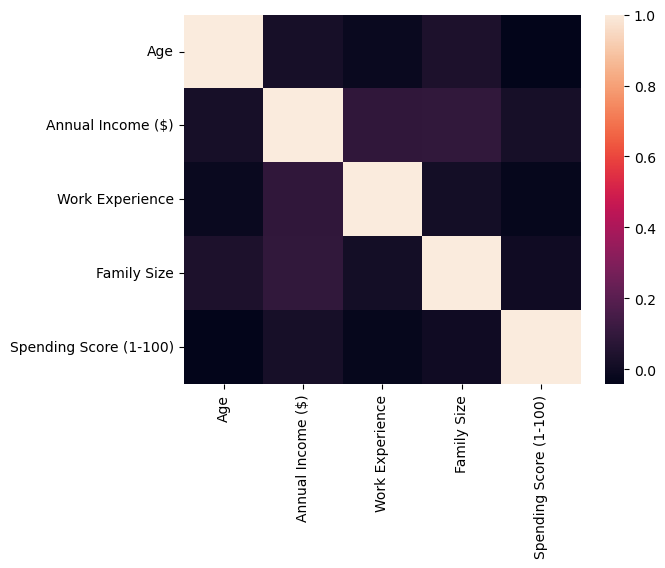

In [10]:
import seaborn as sns

sns.heatmap(pre_df.corr())

#### 📌 히트맵 분석결과 : 독립변수들과의 상관관계가 큰 곳은 찾아볼 수 없다.

In [11]:
import statsmodels.api as sm

features, targets = pre_df.iloc[:,:-1], pre_df.iloc[:, -1]

print(sm.OLS(targets, features).fit().summary())

                                   OLS Regression Results                                  
Dep. Variable:     Spending Score (1-100)   R-squared (uncentered):                   0.708
Model:                                OLS   Adj. R-squared (uncentered):              0.708
Method:                     Least Squares   F-statistic:                              1212.
Date:                    Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                            20:04:12   Log-Likelihood:                         -9730.3
No. Observations:                    2000   AIC:                                  1.947e+04
Df Residuals:                        1996   BIC:                                  1.949e+04
Df Model:                               4                                                  
Covariance Type:                nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0

#### 📌 OLS 분석 결과 
> P>|t| 값이 모두 0이며, Watson은 2 정도로 괜찮은 점수를 보이며,
>
> R<sup>2</sup> 값이 0.708로 1에 가까운 회귀 모형이 적합하다.
>
> 그러나 Family Size의 coef값이 3.3414로 가장 높은 것으로 보아, 아까 corr 값에서는 2위였는데 이 점이 헷갈린다.

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['features'] = features.columns
    return vif

In [13]:
get_vif(features)

,vif_score,features
0,3.172253,Age
1,4.533660,Annual Income ($)
2,1.993979,Work Experience
3,3.746431,Family Size


#### 📌 VIF 분석 결과 
> 전체적으로 팽창 요인 수치가 5를 넘어가지 않았으며, Annual Income이 4.53으로 가장 높았다.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

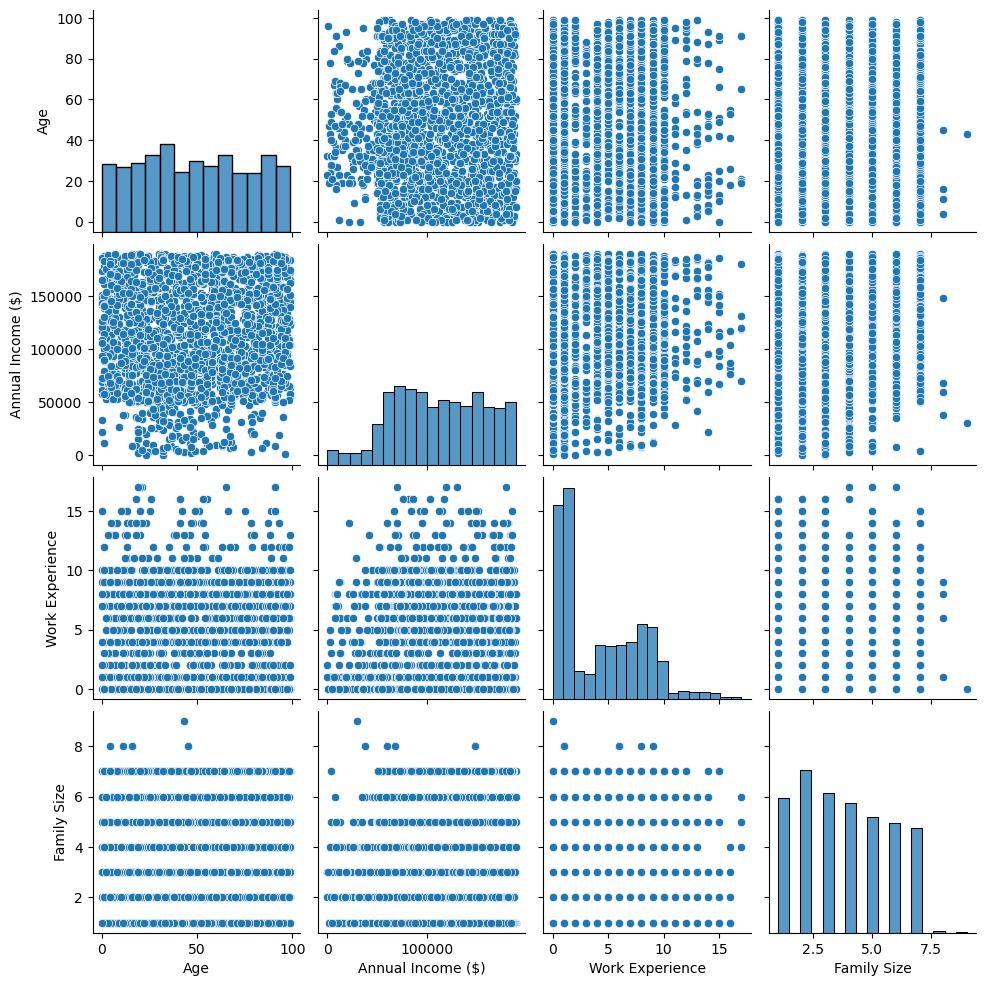

In [14]:
import seaborn as sns

sns.pairplot(features)
plt.show()

### 모든 독립변수 끼리 서로 상관관계가 약하다.

In [15]:
c_df.loc[:,['Gender', 'Profession']]

,Gender,Profession
0,Male,Healthcare
1,Male,Engineer
2,Female,Engineer
3,Female,Lawyer
4,Female,Entertainment
...,...,...
1995,Female,Artist
1996,Female,Doctor
1997,Male,Healthcare
1998,Male,Executive


In [16]:
columns = ['Gender', 'Profession' , 'Age' , 'Annual Income ($)', 'Work Experience', 'Family Size', 'Spending Score (1-100)']

pre_df = c_df.iloc[pre_df.index].loc[:, columns].reset_index(drop=True)
pre_df

,Gender,Profession,Age,Annual Income ($),Work Experience,Family Size,Spending Score (1-100)
0,Male,Healthcare,19,15000,1,4,39
1,Male,Engineer,21,35000,3,3,81
2,Female,Engineer,20,86000,1,1,6
3,Female,Lawyer,23,59000,0,2,77
4,Female,Entertainment,31,38000,2,6,40
...,...,...,...,...,...,...,...
1995,Female,Artist,71,184387,8,7,40
1996,Female,Doctor,91,73158,7,7,32
1997,Male,Healthcare,87,90961,9,2,14
1998,Male,Executive,77,182109,7,2,4


In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
result = label_encoder.fit_transform(pre_df['Gender'])
print(result)
print(label_encoder.classes_)
pre_df['Gender'] = result

[1 1 0 ... 1 1 1]
['Female' 'Male']


In [18]:
pre_df

,Gender,Profession,Age,Annual Income ($),Work Experience,Family Size,Spending Score (1-100)
0,1,Healthcare,19,15000,1,4,39
1,1,Engineer,21,35000,3,3,81
2,0,Engineer,20,86000,1,1,6
3,0,Lawyer,23,59000,0,2,77
4,0,Entertainment,31,38000,2,6,40
...,...,...,...,...,...,...,...
1995,0,Artist,71,184387,8,7,40
1996,0,Doctor,91,73158,7,7,32
1997,1,Healthcare,87,90961,9,2,14
1998,1,Executive,77,182109,7,2,4


In [20]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

one_hot_encoder = OneHotEncoder(sparse_output=False)
result = one_hot_encoder.fit_transform(pre_df[['Profession']])

pre_df = pd.concat([pre_df, pd.DataFrame(result, columns=one_hot_encoder.categories_).astype(np.int8)], axis=1)
pre_df

,Gender,Profession,Age,Annual Income ($),Work Experience,Family Size,Spending Score (1-100),"(Artist,)","(Doctor,)","(Engineer,)","(Entertainment,)","(Executive,)","(Healthcare,)","(Homemaker,)","(Lawyer,)","(Marketing,)","(nan,)"
0,1,Healthcare,19,15000,1,4,39,0,0,0,0,0,1,0,0,0,0
1,1,Engineer,21,35000,3,3,81,0,0,1,0,0,0,0,0,0,0
2,0,Engineer,20,86000,1,1,6,0,0,1,0,0,0,0,0,0,0
3,0,Lawyer,23,59000,0,2,77,0,0,0,0,0,0,0,1,0,0
4,0,Entertainment,31,38000,2,6,40,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,Artist,71,184387,8,7,40,1,0,0,0,0,0,0,0,0,0
1996,0,Doctor,91,73158,7,7,32,0,1,0,0,0,0,0,0,0,0
1997,1,Healthcare,87,90961,9,2,14,0,0,0,0,0,1,0,0,0,0
1998,1,Executive,77,182109,7,2,4,0,0,0,0,1,0,0,0,0,0


In [21]:
pre_df = pre_df.drop(labels=['Profession'], axis=1)
pre_df

,Gender,Age,Annual Income ($),Work Experience,Family Size,Spending Score (1-100),"(Artist,)","(Doctor,)","(Engineer,)","(Entertainment,)","(Executive,)","(Healthcare,)","(Homemaker,)","(Lawyer,)","(Marketing,)","(nan,)"
0,1,19,15000,1,4,39,0,0,0,0,0,1,0,0,0,0
1,1,21,35000,3,3,81,0,0,1,0,0,0,0,0,0,0
2,0,20,86000,1,1,6,0,0,1,0,0,0,0,0,0,0
3,0,23,59000,0,2,77,0,0,0,0,0,0,0,1,0,0
4,0,31,38000,2,6,40,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,71,184387,8,7,40,1,0,0,0,0,0,0,0,0,0
1996,0,91,73158,7,7,32,0,1,0,0,0,0,0,0,0,0
1997,1,87,90961,9,2,14,0,0,0,0,0,1,0,0,0,0
1998,1,77,182109,7,2,4,0,0,0,0,1,0,0,0,0,0


In [22]:
pre_df.corr()['Spending Score (1-100)'].sort_values(ascending=False)[1:]

(Artist,)            0.040791
(Entertainment,)     0.025777
Annual Income ($)    0.023299
(Doctor,)            0.009939
Family Size          0.002232
Gender              -0.000528
(Healthcare,)       -0.007219
(Executive,)        -0.010930
(Marketing,)        -0.016935
(Lawyer,)           -0.020821
(Engineer,)         -0.022408
(Homemaker,)        -0.028835
Work Experience     -0.028948
(nan,)              -0.031224
Age                 -0.041798
Name: Spending Score (1-100), dtype: float64

In [25]:
pre_df.columns = ['Gender', 'Age', 'Annual Income ($)','Work Experience', 'Family Size',
                 'Spending Score (1-100)','Artist','Doctor','Engineer',
                  'Entertainment',
                 'Executive','Healthcare','Homemaker','Lawyer',
                 'Marketing','nan']
pre_df


,Gender,Age,Annual Income ($),Work Experience,Family Size,Spending Score (1-100),Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,nan
0,1,19,15000,1,4,39,0,0,0,0,0,1,0,0,0,0
1,1,21,35000,3,3,81,0,0,1,0,0,0,0,0,0,0
2,0,20,86000,1,1,6,0,0,1,0,0,0,0,0,0,0
3,0,23,59000,0,2,77,0,0,0,0,0,0,0,1,0,0
4,0,31,38000,2,6,40,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,71,184387,8,7,40,1,0,0,0,0,0,0,0,0,0
1996,0,91,73158,7,7,32,0,1,0,0,0,0,0,0,0,0
1997,1,87,90961,9,2,14,0,0,0,0,0,1,0,0,0,0
1998,1,77,182109,7,2,4,0,0,0,0,1,0,0,0,0,0


array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income ($)'}>,
        <Axes: title={'center': 'Work Experience'}>],
       [<Axes: title={'center': 'Family Size'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>,
        <Axes: title={'center': 'Artist'}>,
        <Axes: title={'center': 'Doctor'}>],
       [<Axes: title={'center': 'Engineer'}>,
        <Axes: title={'center': 'Entertainment'}>,
        <Axes: title={'center': 'Executive'}>,
        <Axes: title={'center': 'Healthcare'}>],
       [<Axes: title={'center': 'Homemaker'}>,
        <Axes: title={'center': 'Lawyer'}>,
        <Axes: title={'center': 'Marketing'}>,
        <Axes: title={'center': 'nan'}>]], dtype=object)

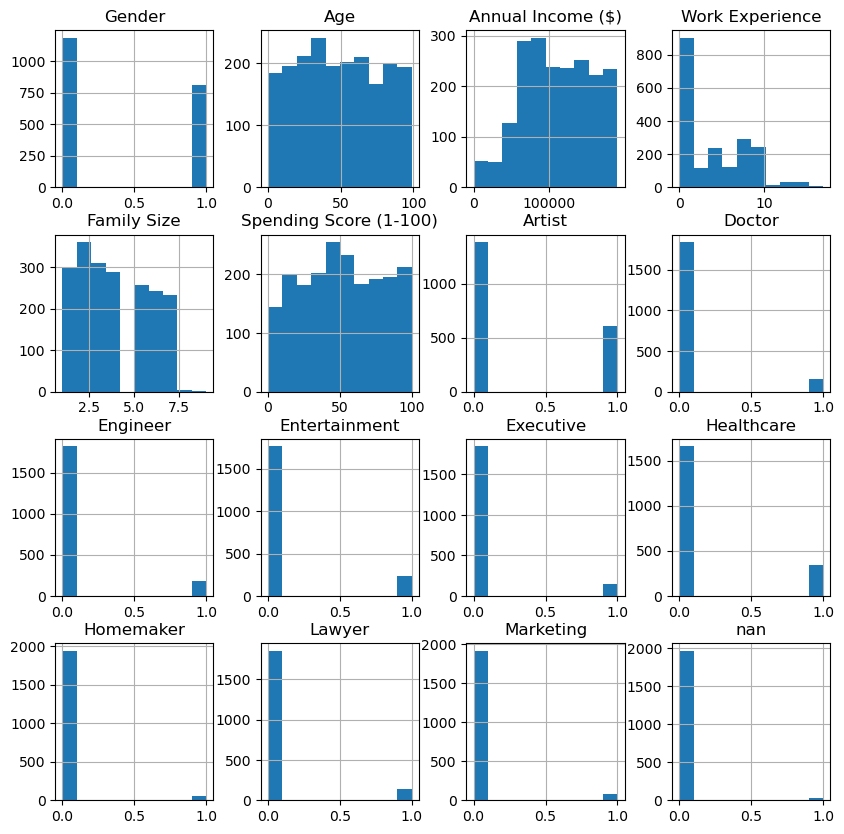

In [26]:
pre_df.hist(figsize=(10,10))

In [41]:
pre_df = pre_df[['Gender','Age',	'Annual Income ($)','Work Experience','Family Size','Spending Score (1-100)']]

In [42]:
from statsmodels.api import OLS

features, targets = pre_df.iloc[:,:-1], pre_df.iloc[:,-1]

model = OLS(targets, features)
print(model.fit().summary())

                                   OLS Regression Results                                  
Dep. Variable:     Spending Score (1-100)   R-squared (uncentered):                   0.711
Model:                                OLS   Adj. R-squared (uncentered):              0.710
Method:                     Least Squares   F-statistic:                              982.7
Date:                    Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                            20:22:10   Log-Likelihood:                         -9720.6
No. Observations:                    2000   AIC:                                  1.945e+04
Df Residuals:                        1995   BIC:                                  1.948e+04
Df Model:                               5                                                  
Covariance Type:                nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0

In [44]:
get_vif(features)

,vif_score,features
0,1.610011,Gender
1,3.213638,Age
2,4.650361,Annual Income ($)
3,2.004470,Work Experience
4,3.789821,Family Size


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [46]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [47]:
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 784.0537, RMSE: 28.0010, MSLE: 0.7124, RMSLE: 0.8441, R2: -0.0120
